In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
# original data
data = pd.read_csv("../Data/AggregateData.csv")
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [3]:
data.head()

url  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  https://xe.chotot.com/mua-ban-oto-thanh-pho-lo...   
4  https://xe.chotot.com/mua-ban-oto-quan-tan-bin...   

                                         description    origin      status  \
0  🔹 HÀNG MỚI VỀ\n🔹 BMW 520i \n🔹 MODEL 2016\n🔹 Od...       Đức  Đã sử dụng   
1  Bán nissan - Gran Livina nhập khẩu số tự động ...  Nhật Bản  Đã sử dụng   
2  Auto88 về Mercedes C200 sx 2017 đky 2/2018 chạ...  Việt Nam  Đã sử dụng   
3  xe còn đẹp gia đình đang xử dụng. Cần bán xe đ...  Nhật Bản  Đã sử dụng   
4  Xe gia đình đi, còn khá mới vì do công việc nê...  Việt Nam  Đã sử dụng   

   car_mileage car_color  car_seats     gear  car_year     car_price  \
0      50000.0       Đen        4.0  Tự động    2015.0  1.170000e+09   
1      12000.0       Xám        3.0  Tự động    2009.0  2.700000e+02   
2      30000.0       Xám        2.0  Tự động    2018.0  1.090000e+09   
3        120.0     Trắng        2.0  Tự động    2017.0  4.900000e+08   
4      53000.0       Đen        2.0  Tự động    2016.0  4.000000e+08   

           style      createdAt         model  fuel     brand_name  \
0          Sedan   2 phút trước      5 Series  Xăng            BMW   
1  Minivan (MPV)   6 phút trước  Grand livina  Xăng         Nissan   
2          Sedan   7 phút trước       C Class  Xăng  Mercedes Benz   
3      Hatchback   9 phút trước          CX 3  Xăng          Mazda   
4          Sedan  10 phút trước         Cruze  Xăng      Chevrolet   

      region_name                                          url_image website  
0          Hà Nội  https://cdn.chotot.com/namB6E0XkDPkf9h8KoahoRB...  chotot  
1          Hà Nội  https://cdn.chotot.com/50R_cYWFPAz0wHZqPAGaFr-...  chotot  
2          Hà Nội  https://cdn.chotot.com/bhfeL3dPtccDnzlKzeAZ88X...  chotot  
3        An Giang  https://cdn.chotot.com/bZA5uIvzseB-MBKCPcDKe4K...  chotot  
4  Tp Hồ Chí Minh  https://cdn.chotot.com/c7q5pfENmvTLnzxYQ7MA70P...  chotot

# Process date

In [4]:
def transform_data(dataset):
    datetime = dataset["createdAt"]
    year = []
    month = []
    for x in datetime:
        if x[-2:] == "ớc":
            if "tháng" in x:
                time_duration = int(x.split(" ")[0])
                create_month = 11 - time_duration
                if create_month < 1:
                    create_month += 12
                    create_year = 2020
                else:
                    create_year = 2021
            else:
                create_month = 11
                create_year = 2021
            year.append(create_year)
            month.append(create_month)
        elif x == "hôm qua":
            month.append(11)
            year.append(2021)
        else:
#             print(x.split('/'))
            month_, year_ = x.split("/")[1:]
            month.append(int(month_))
            year.append(int(year_))
    return month, year

In [5]:
month, year = transform_data(data)

In [6]:
data["month"] = month
data["year"] = year
data = data.drop(["createdAt"], axis=1)

# Feature extraction from description
* Note: Need tokenize method for extraction

# Preprocess null value
* Note: fields contain null value:
        region_name, fuel,  model, style, car_price, gear, car_seats, car_color, origin
* Need extract model and brand name from description

## Process brand name
* Remove vietnamese brand name and check null values.

In [7]:
data.shape

(66087, 19)

In [8]:
brand_names = data["brand_name"].unique()
brand_names

array(['BMW', 'Nissan', 'Mercedes Benz', 'Mazda', 'Chevrolet', 'Hyundai',
       'Toyota', 'Honda', 'Suzuki', 'Kia', 'Mitsubishi', 'Peugeot',
       'Ford', 'Isuzu', 'Daewoo', 'Renault', 'Hãng khác', 'BYD',
       'Proton', 'Porsche', 'Lexus', 'LandRover', nan, 'Vinfast', 'Audi',
       'Infiniti', 'Baic', 'Jeep', 'Jaguar', 'Fiat', 'MG', 'Chery',
       'Chrysler', 'Acura', 'Volvo', 'Volkswagen', 'Asia', 'Bentley',
       'Mini', 'Opel', 'Mekong', 'Cadillac', 'Daihatsu', 'Samsung',
       'Dodge', 'Maybach', 'Ferrari', 'Alfa Romeo', 'Lincoln', 'Citroen',
       'UAZ', 'Smart', 'Subaru', 'Rolls Royce', 'Lifan', 'Reult', 'Buick',
       'SYM', 'Lada', 'GMC', 'Luxgen', 'Geely', 'Man', 'Aston Martin',
       'Gaz', 'Haima', 'Maserati', 'VinFast', 'Thaco', 'Dongben',
       'Ssangyong', 'McLaren', 'Dongfeng', 'Changan', 'Scion', 'Hino',
       'Lamborghini', 'Morgan', 'Vinaxuki', 'RAM', 'Tobe', 'Zotye', 'JRD'],
      dtype=object)

In [9]:
delete_brand_name = []

In [10]:
mask = data["brand_name"].apply(lambda x: x not in delete_brand_name)
mask

0        True
1        True
2        True
3        True
4        True
         ... 
70884    True
70885    True
70886    True
70887    True
70888    True
Name: brand_name, Length: 66087, dtype: bool

In [11]:
data = data[mask]
data.shape

(66087, 19)

## Process model name
* Remove vietnamese model

In [12]:
deleted_model_name = ["Tmt 2,4 Tấn", "Tmt Ben 2.4 Tấn", "Dothanh Iz65 2T53T5", "Chiến Thắng", "Xe Cẩu", "Hoa Mai",
                     "Dongben", "Xe Nâng", "Cuu Long", "Cửu Long", "Dongfeng", "Cnhtc", "Trường Giang",
                     "Tải Van Jac", "Tải 700Kg", "Dong Ben", "Do Thanh Iz650", "Chiến Thắng 700Kg", "Hoang Tra",
                     "Do Thanh", "Giai Phong", "Van 8Cho", "Chenglong", "Giai Phong", "Thanh Công", "Hồng Hà", 
                     "Giải Phóng", "Dong Feng", "Xe Tải", "Xe Tai", "Trường Giang 5T", "Tải 3,45T", "Chiến Thắng 1 Tấn",
                     "Cuulong 4T75", "Cửu Long 4,75 Tấn", "Tải 7T", "Chiến Thắng 6T2", "Cuu Long 8T", "Hoa Main 2,35 Tấn",
                     "Xe Tải Dfac", "Dai Loan", "Giải Phóng 1.5T", "Teraco 1 Tấn", "Hoa Main 3,6T", "Chiến Thắng 1.25T",
                     "Truonglong", "Huy Hoàng", "Cửu Long 850Kg", "Cửulong 4T75", "Cửu Long 1,25 Tấn", "Cửu Long 2 Tấn",
                     "H 100", "Cửu Long 1.95 Tấn", "Cửu Long 3,5T", "Hoàng Huy", "Trường Hải 6T", "Kenbo 900Kg", "Tmt 7,5 Tấn",
                     "Xe Tai 8T", "Trường Giang 7Tấn 8M", "Tai Ben 6T2", "Tmt 4,6 Tấn", "Chiến Thắng 3.48Tấn", "Xe Khach",
                     "Tmt 6,8 Tấn", "Jinbei 750Kg", "Tmt Cửu Long", "Thanh Cng", "Dong Feng 6T", "Hoa Mai 2T", "Tải 8T",
                     'Xe Tải 2 Cầu', 'Xúc Cater E450', 'Hoa Mai 3,6T', 'Chiến Thắng 1,25T', 'CửU Long 850Kg', 'Hoa Mai 2,35 Tấn']

In [13]:
mask_model = data["model"].apply(lambda x: x not in deleted_model_name)

In [14]:
data = data[mask_model]
data.shape

(65738, 19)

In [15]:
data = data.reset_index(drop=True)

## Fix null data by add information from detection model

In [16]:
dir_result = os.listdir("../GetColorHang/2021_12_14_data_not_brand/")
map_dir_result = list(pd.Series(dir_result).apply(lambda x: x.replace("%3A", ":").replace("%2F", "/")[:-5]))
mask_url_image = data["url_image"].apply(lambda x: x in map_dir_result)

### Analysis result from detection model

In [17]:
import json
count_error = 0
valid_url = []
valid_file = []
for ind, item in enumerate(dir_result):
    with open("../GetColorHang/2021_12_14_data_not_brand/" + item) as f:
        content_js = json.load(f)
    if 'error' in list(content_js):
        count_error += 1
    else:
        valid_file.append(dir_result[ind])
        valid_url.append(map_dir_result[ind])

valid_url = [item.split("(")[0].strip() for item in valid_url]

In [18]:
color_list = [json.load(open("../GetColorHang/2021_12_14_data_not_brand/" + file))["color"]["name"] for file in valid_file]

In [19]:
color_dict = {"Green": "Xanh", "White": "Trắng", "Black": "Đen", "Beige": "Be", "Silver": "Bạc", "Blue": "Xanh",
             "Gray": "Xám", "Red": "Đỏ", "Brown": "Nâu", "Orange": "Cam", "Yellow": "Vàng", "Goldish": "Vàng nhẹ",
             "Light Blue": "Xanh nhẹ"}

In [20]:
data["brand_name"].isnull().sum()

356

In [21]:
for ids, url in enumerate(valid_url):
    selection = data[data["url_image"] == url]
    with open("../GetColorHang/2021_12_14_data_not_brand/" + valid_file[ids]) as f:
        content_json = json.load(f)
    if selection.shape[0] == 0:
        continue
    try:
#         if selection.shape[0] > 0:
#             print(selection)
        # Update color
        idss = data.index[data["url_image"] == url].tolist()[0]
        if str(selection.iloc[0]["car_color"]) == "nan" and content_json["color"]["name"] != "":
            if "/" in content_json["color"]["name"]:
                data.loc[idss, "car_color"] = "Nhiều màu"
            else:
                data.loc[idss, "car_color"] = color_dict(content_json["color"]["name"])
        # Update brand
        if str(selection["brand_name"].iloc[0]) == "nan" and content_json["car"]["make"] != "":
            data.loc[idss, "brand_name"] = content_json["car"]["make"]
        # Update model
        if str(selection["model"].iloc[0]) == "nan" and content_json["car"]["model"] != "":
            data.loc[idss, "model"] = content_json["car"]["model"]
    except:
        continue

## Fix price of cars

In [22]:
data["car_name"] = data["brand_name"] + pd.Series([" "]*data.shape[0]) + data["model"]

In [23]:
group_car = data[data["car_price"].isnull()].groupby("car_name")

In [24]:
list(group_car.first())

['url',
 'description',
 'origin',
 'status',
 'car_mileage',
 'car_color',
 'car_seats',
 'gear',
 'car_year',
 'car_price',
 'style',
 'model',
 'fuel',
 'brand_name',
 'region_name',
 'url_image',
 'website',
 'month',
 'year']

In [25]:
car_with_null_price = group_car.first().reset_index()["car_name"].tolist()

In [26]:
car_with_null_price

['Aston Martin Dòng khác',
 'Daewoo Matiz',
 'Ford EcoSport',
 'Ford Everest',
 'Ford Laser',
 'Ford Transit',
 'Honda Civic',
 'Honda HR-V',
 'Hyundai Accent',
 'Hyundai Grand i10',
 'Hyundai Santa Fe',
 'Hyundai Universe',
 'Kia Cerato',
 'Kia K3',
 'Kia Morning',
 'Kia Rio',
 'Kia Rondo',
 'Mercedes Benz S Class',
 'Mitsubishi Jolie',
 'Mitsubishi Pajero Sport',
 'Mitsubishi Triton',
 'Mitsubishi Xpander',
 'Nissan Almera',
 'Nissan Bluebird',
 'Nissan Navara',
 'Toyota Camry',
 'Toyota Corolla Cross',
 'Toyota Fortuner',
 'Toyota Innova',
 'Toyota Land Cruiser Prado']

In [27]:
not_null_price = data[data["car_price"].notnull()]

In [28]:
mask1 = data["car_price"].isnull()
mask2 = data["car_name"] == "Aston Martin Dòng khác"

In [29]:
for item in car_with_null_price:
    preference = not_null_price[not_null_price["car_name"] == item]
    if preference.shape[0] == 0:
        print(item)
        continue
        
    idss = data.index[data["car_price"].isnull()&(data["car_name"] == item)].tolist()
    price_ = preference["car_price"].mean()
    for idx in idss:
        data.loc[idx, "car_price"] = price_

Aston Martin Dòng khác


### There is a Aston Martin that can not fix price --> Drop

In [30]:
data = data[data["car_name"] != "Aston Martin Dòng khác"].reset_index(drop=True)

## Fix too high and too low price
* Threshold for too hight is 100e9
* Threshold for too low is 10e6

In [31]:
too_high_data = data[data["car_price"] >= 100e9]

In [32]:
too_high_data

url  \
16926  https://xe.chotot.com/mua-ban-oto-thanh-pho-ko...   
19500  https://xe.chotot.com/mua-ban-oto-quan-tan-phu...   

                                             description    origin  \
16926  Xe gia đình chạy bão dưỡng ki  âm thanh màn hì...     Ấn Độ   
19500  Muốn đổi nghề cần ra đi xe Migrace 2016 AT...  Thái Lan   

           status  car_mileage car_color  car_seats     gear  car_year  \
16926  Đã sử dụng     170000.0     Trắng        2.0   Số sàn    2014.0   
19500  Đã sử dụng     170000.0       Xám        2.0  Tự động    2016.0   

          car_price      style      model  fuel  brand_name     region_name  \
16926  1.900000e+11      Sedan  Grand i10   NaN     Hyundai         Kon Tum   
19500  2.900000e+11  Hatchback     Mirage  Xăng  Mitsubishi  Tp Hồ Chí Minh   

                                               url_image website  month  year  \
16926  https://cdn.chotot.com/u6ndfq_gUxcqaAGMR-Yjnoj...  chotot     11  2021   
19500  https://cdn.chotot.com/Y781N248CG6H5KgpT0HRjOm...  chotot     10  2021   

                car_name  
16926  Hyundai Grand i10  
19500  Mitsubishi Mirage

### It seem like the price in 190e6 and 290e6 --> Easy fix

In [33]:
data.loc[16926, "car_price"] = 190e6
data.loc[19500, "car_price"] = 290e6

In [34]:
too_low_data = data[data["car_price"] <= 10e6]

In [35]:
too_low_data

url  \
1                                                    NaN   
124    https://xe.chotot.com/mua-ban-oto-quan-tan-bin...   
133    https://xe.chotot.com/mua-ban-oto-quan-cau-gia...   
633    https://xe.chotot.com/mua-ban-oto-huyen-duy-xu...   
655                                                  NaN   
...                                                  ...   
24898  https://xe.chotot.com/mua-ban-oto-huyen-cu-chi...   
24911  https://xe.chotot.com/mua-ban-oto-quan-11-tp-h...   
25099  https://xe.chotot.com/mua-ban-oto-quan-1-tp-ho...   
25196  https://xe.chotot.com/mua-ban-oto-thanh-pho-th...   
25536                                                NaN   

                                             description    origin  \
1      Bán nissan - Gran Livina nhập khẩu số tự động ...  Nhật Bản   
124    Chính chủ cần bán xe Honda City đời 2014 màu t...  Việt Nam   
133    Cần bán Kia K3 mua mới tại hãng 9/2015. Biển 3...  Việt Nam   
633                 Xe di can doi nen ban lai cho ai can  Nhật Bản   
655    Bán để lên đời  Kia Caren 2.0 đời 2015 số sàn....       NaN   
...                                                  ...       ...   
24898  👉Cần bán Innova 03/2020. Odo 50.000km.\n✊Ai ko...  Nhật Bản   
24911  Cần bán Vios std sx 2018 odo 8v  xe nhà rất ít...  Việt Nam   
25099          xe o to gia re tai tphcm sai gon gia dinh       NaN   
25196  thay ma do choi con du 4 mam zin xe elantra. c...       NaN   
25536  📢📢📢 Nhận chở thuê xe 7 chỗ Fotuner đi tỉnh và ...  Nhật Bản   

           status  car_mileage car_color  car_seats     gear  car_year  \
1      Đã sử dụng      12000.0       Xám        3.0  Tự động    2009.0   
124    Đã sử dụng     125000.0     Trắng        2.0  Tự động    2014.0   
133    Đã sử dụng      50000.0     Trắng        2.0   Số sàn    2015.0   
633    Đã sử dụng     120000.0       Đen        2.0   Số sàn    2004.0   
655    Đã sử dụng     600000.0       Đen        3.0   Số sàn    2015.0   
...           ...          ...       ...        ...      ...       ...   
24898  Đã sử dụng      51000.0       Nâu        3.0   Số sàn    2020.0   
24911  Đã sử dụng      80000.0     Trắng        2.0  Tự động    2018.0   
25099  Đã sử dụng       6000.0       NaN        NaN  Tự động    2018.0   
25196  Đã sử dụng          9.0       NaN        2.0  Tự động    2021.0   
25536  Đã sử dụng       2000.0       Bạc        3.0  Tự động    2021.0   

       car_price             style         model  fuel brand_name  \
1          270.0     Minivan (MPV)  Grand livina  Xăng     Nissan   
124     330000.0             Sedan          City  Xăng      Honda   
133        368.0             Sedan            K3  Xăng        Kia   
633      45000.0    Kiểu dáng khác           Ray  Xăng        Kia   
655     275000.0  SUV / Cross over        Carens  Xăng        Kia   
...          ...               ...           ...   ...        ...   
24898  6500000.0     Minivan (MPV)        Innova  Xăng     Toyota   
24911   400000.0             Sedan          Vios  Xăng     Toyota   
25099  6700000.0               NaN            EL   NaN      Acura   
25196  5000000.0               NaN       Elantra  Xăng    Hyundai   
25536  5000000.0         Hatchback      Fortuner  Xăng     Toyota   

          region_name                                          url_image  \
1              Hà Nội  https://cdn.chotot.com/50R_cYWFPAz0wHZqPAGaFr-...   
124    Tp Hồ Chí Minh  https://cdn.chotot.com/8YvjzsC20r8CMdanjtnYNXV...   
133            Hà Nội  https://cdn.chotot.com/p_RBmfKjBNA8XBh-PWkHiIT...   
633         Quảng Nam  https://cdn.chotot.com/jkiBwSCd-E7HrkMZDus0e2m...   
655         Thanh Hóa  https://cdn.chotot.com/NHlTBwpGuHxHUEQChixgDcl...   
...               ...                                                ...   
24898  Tp Hồ Chí Minh  https://cdn.chotot.com/zSPhyuWpXvHrfN80k2Maa1q...   
24911  Tp Hồ Chí Minh  https://cdn.chotot.com/7q3P8-vh8fJ22GwbwrnTBzj...   
25099  Tp Hồ Chí Minh  https://cdn.chotot.com/q6V-danCobyt9as08OPWVG6...   
25196      Bì

### There are more than 200 rows of too low price

In [36]:
normal_data = data[data["car_price"].notnull()&(data["car_price"]>10e6)]

In [37]:
too_low_index = too_low_data.index.tolist()

In [38]:
for index in too_low_index:
    preference = normal_data[normal_data["car_name"] == data.loc[index, "car_name"]]
    if preference.shape[0] == 0:
        print(data.loc[index, "car_name"])
        continue
    print(preference["car_price"].mean())
    data.loc[index, "car_price"] = preference["car_price"].mean()

234250000.0
480142857.14172333
527580193.73612094
672500000.0
285724252.49169433
436083724.7858148
882803089.5000862
517083333.3333333
499471439.004901
388186627.82936096
388186627.82936096
411137931.0344828
189737493.75
590283590.9090909
590283590.9090909
793913043.4782609
541114060.5714285
426493306.0327689
69640681.39847288
Toyota Supra
1310764976.953917
436083724.7858148
59137931.03448276
171593225.30555555
759042704.0504233
436083724.7858148
171593225.30555555
1162187223.2757747
685898812.059598
493879734.5330003
759042704.0504233
388186627.82936096
69640681.39847288
556947851.8073454
759042704.0504233
310857053.68164796
423988411.58940357
685898812.059598
446488317.7570093
1310764976.953917
628303030.3030303
882803089.5000862
169836000.0
388186627.82936096
556947851.8073454
63666666.666666664
153432079.43370166
556947851.8073454
759042704.0504233
401725806.4516129
1959825654.1087866
480142857.14172333
205326923.07692307
277970000.0
505569032.2567742
289882345.9916821
169836000.0


In [39]:
too_low_data = data[data["car_price"] <= 10e6]

In [40]:
too_low_data

url  \
3237   https://xe.chotot.com/mua-ban-oto-quan-hai-cha...   
10520  https://xe.chotot.com/mua-ban-oto-thanh-pho-hu...   
12373  https://xe.chotot.com/mua-ban-oto-quan-cau-gia...   
14779  https://xe.chotot.com/mua-ban-oto-quan-tan-bin...   
15936  https://xe.chotot.com/mua-ban-oto-thanh-pho-pl...   
18021  https://xe.chotot.com/mua-ban-oto-quan-binh-ta...   
23355  https://xe.chotot.com/mua-ban-oto-quan-binh-th...   

                                             description    origin  \
3237   Xe gia dinh, len doi can chuyen nhuong. Xe dep...  Việt Nam   
10520  Cửa hàng oto MuoiNguyen cần mua oto củ tại Huế...       NaN   
12373  Xe huyndai 2,5t cũ dơi 2003-2006 bảo đảm mua g...  Hàn Quốc   
14779  Mình cần mua 1 chiếc xe suzuki viva 110cc zin ...       NaN   
15936  ae nào có con suzuki chia lại giá hợp lý hú 1 ...       NaN   
18021  Mình cần thuê dài hạn anh chị nào có liên hệ ....       NaN   
23355  cần bán gấp xe còn rin còn đầy đủ ai mu...  Việt Nam   

           status  car_mileage car_color  car_seats     gear  car_year  \
3237   Đã sử dụng        100.0       Đen        3.0  Tự động    2009.0   
10520  Đã sử dụng          0.0       NaN        NaN      NaN       NaN   
12373  Đã sử dụng          0.0       NaN        NaN   Số sàn    2004.0   
14779  Đã sử dụng          0.0       NaN        NaN      NaN       NaN   
15936  Đã sử dụng          0.0       NaN        NaN      NaN       NaN   
18021  Đã sử dụng          0.0       NaN        NaN      NaN       NaN   
23355  Đã sử dụng      35522.0        Đỏ        NaN  Tự động    2018.0   

        car_price             style      model  fuel brand_name  \
3237        415.0  SUV / Cross over      Supra  Xăng     Toyota   
10520   8386000.0               NaN        NaN   NaN        NaN   
12373   9999999.0               NaN    eMighty   NaN    Hyundai   
14779   7000000.0               NaN        NaN   NaN        NaN   
15936  10000000.0               NaN        NaN   NaN        NaN   
18021   9000000.0               NaN        NaN   NaN        NaN   
23355   7000000.0               NaN  Dòng khác  Xăng        SYM   

          region_name                                          url_image  \
3237          Đà Nẵng  https://cdn.chotot.com/vOyHGvWrTcwRtldjBNCgfoF...   
10520  Thừa Thiên Huế  https://cdn.chotot.com/mXFLAGlU1cE-pJ1XNPXBCzi...   
12373          Hà Nội  https://cdn.chotot.com/QJxlBIAk7BvMD8BHb8BGo0B...   
14779  Tp Hồ Chí Minh                                                NaN   
15936         Gia Lai  https://cdn.chotot.com/g7-5LPJFhJr4ud4nybUSJfV...   
18021  Tp Hồ Chí Minh  https://cdn.chotot.com/4qUkG2FijejC02NnZ9HgXvH...   
23355         Cần Thơ  https://cdn.chotot.com/Yv1IxUbSdX2XF1SvTDSBoRP...   

      website  month  year         car_name  
3237   chotot     11  2021     Toyota Supra  
10520  chotot     11  2021              NaN  
12373  chotot     11  2021  Hyundai eMighty  
14779  chotot     11  2021              NaN  
15936  chotot     11  2021              NaN  
18021  chotot     11  2021              NaN  
23355  chotot      9  2021    SYM Dòng khác

### There is a row is easy fix, other is no hint to fix --> drop

In [41]:
data.loc[3237, "car_price"] = 41510e6

In [42]:
data = data.drop([10520, 12373, 14779, 15936, 18021, 23355])

## Fix other field with null value
* origin: hard to fix                     (fixed)
* status: easy fix                        (fixed)
* car_mileage: easy fix                   (fixed)
* car_color: hard to fix
* car_seats: medium                        (fixed)
* gear: no hint --> can check manually
* car_year: hard to check
* style: medium                            (fixed)
* model: hard to fix                       (dropped)  
* fuel: medium
* brand_name: hard to fix                  (dropped) 
* region_name: hard to fix

In [43]:
data = data.drop(["car_name"], axis=1)

In [44]:
data.isnull().sum()

url             6820
description        0
origin          3322
status             2
car_mileage        2
car_color       3461
car_seats       1203
gear             182
car_year         156
car_price          1
style           1502
model            488
fuel            1489
brand_name       244
region_name    14671
url_image        429
website            0
month              0
year               0
dtype: int64

In [45]:
# Remove null brand name and model

data = data[data["brand_name"].notnull()&data["model"].notnull()].reset_index(drop=True)

In [46]:
data.isnull().sum()

url             6767
description        0
origin          3166
status             2
car_mileage        1
car_color       3303
car_seats       1046
gear              31
car_year           5
car_price          0
style           1344
model              0
fuel            1332
brand_name         0
region_name    14360
url_image        381
website            0
month              0
year               0
dtype: int64

In [47]:
data[data["status"].isnull()]

url  \
6719  https://xe.chotot.com/mua-ban-oto-quan-long-bi...   
9698                                                NaN   

                                            description    origin status  \
6719  Chevoret crui LTZ sx 2017. Đẹp không thở được....       NaN    NaN   
9698  cần bán hyundai j10 sx 2015 xe zin đep nội n...  Việt Nam    NaN   

      car_mileage car_color  car_seats    gear  car_year    car_price  style  \
6719      70000.0       NaN        NaN     NaN    2017.0  445000000.0    NaN   
9698      50000.0      Xanh        1.0  Số sàn       NaN  195000000.0  Sedan   

          model fuel brand_name     region_name  \
6719      Cruze  NaN  Chevrolet          Hà Nội   
9698  Grand i10  NaN    Hyundai  Tp Hồ Chí Minh   

                                              url_image website  month  year  
6719  https://cdn.chotot.com/uUNPqA1ped5SwisNITABJju...  chotot     11  2021  
9698  https://cdn.chotot.com/hh9yx0QYzvve-qH6-R68qrF...  chotot     11  2021

In [48]:
# Manually fix status
data.loc[6719, "status"] = "Đã sử dụng"
data.loc[9698, "status"] = "Đã sử dụng"

In [49]:
data.isnull().sum()

url             6767
description        0
origin          3166
status             0
car_mileage        1
car_color       3303
car_seats       1046
gear              31
car_year           5
car_price          0
style           1344
model              0
fuel            1332
brand_name         0
region_name    14360
url_image        381
website            0
month              0
year               0
dtype: int64

In [50]:
# Remove null car_mileage
data = data.drop(7986).reset_index(drop=True)

### Fix origin
* Finally, there 21 origin can not fix

In [51]:
data["car_name"] = data["brand_name"] + pd.Series([" "]*data.shape[0]) + data["model"]

In [52]:
null_origin = data[data["origin"].isnull()]

not_null_origin = data[data["origin"].notnull()]

In [53]:
null_model = null_origin["car_name"].unique().tolist()

In [54]:
for each in null_model:
    preference = not_null_origin[not_null_origin["car_name"] == each]
    if preference.shape[0] == 0:
        print(each)
        continue
    mode_ = preference["origin"].mode().tolist()[0]
    print(mode_)
    idss = data.index[data["origin"].isnull()&(data["car_name"] == each)].tolist()
    for idx in idss:
        data.loc[idx, "origin"] = mode_

Việt Nam
Nước khác
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Thái Lan
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Thái Lan
Việt Nam
Việt Nam
Việt Nam
Ấn Độ
Việt Nam
Việt Nam
Nước khác
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Nước khác
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Nhật Bản
Nhật Bản
Việt Nam
Isuzu FVR
Nước khác
Nước khác
Nước khác
Việt Nam
Việt Nam
Việt Nam
Nước khác
Nhật Bản
Việt Nam
Nước khác
Việt Nam
Nước khác
Việt Nam
Việt Nam
Việt Nam
Nước khác
Nước khác
Nước khác
Việt Nam
Nước khác
Thái Lan
Nước khác
Việt Nam
Việt Nam
Nước khác
Việt Nam
Việt Nam
Nước khác
Việt Nam
Việt Nam
Nước khác
Nước khác
Mỹ
Nước khác
Thái Lan
Thái Lan
Nước khác
Nước khác
Nước khác
Việt Nam
Việt Nam
Nước khác
Việt Nam
Nước khác
Nước khác
Nước khác
Nước khác
Nước khác
Việt Nam
Nước khác
Việt Nam
Việt Nam
Nước khác
Nước khác
Việt Nam
Nước khác
Việt Nam
Việt Nam
Nước khác
Việt Nam
Nước khác
Nhật Bản
Nước khác
Việt Nam
Việt Nam
Việt Nam
Việt Nam
Thái Lan
N

In [55]:
data.isnull().sum()

url             6767
description        0
origin            21
status             0
car_mileage        0
car_color       3303
car_seats       1046
gear              31
car_year           5
car_price          0
style           1344
model              0
fuel            1332
brand_name         0
region_name    14360
url_image        381
website            0
month              0
year               0
car_name           0
dtype: int64

### Fix car_seat

In [56]:
null_car_seat = data[data["car_seats"].isnull()]
not_null_car_seat = data[data["car_seats"].notnull()]

In [57]:
model_null_seat = not_null_car_seat["car_name"].unique().tolist()

In [58]:
for each in model_null_seat:
    preference = not_null_car_seat[not_null_car_seat["car_name"] == each]
    if preference.shape[0] == 0:
        print(each)
        continue
    idss = data.index[data["car_seats"].isnull()&(data["car_name"] == each)].tolist()
    mode_ = preference["car_seats"].mode().tolist()[0]
    for idx in idss:
        data.loc[idx, "car_seats"] = mode_

In [59]:
data.isnull().sum()

url             6767
description        0
origin            21
status             0
car_mileage        0
car_color       3303
car_seats         29
gear              31
car_year           5
car_price          0
style           1344
model              0
fuel            1332
brand_name         0
region_name    14360
url_image        381
website            0
month              0
year               0
car_name           0
dtype: int64

### Fix stype

In [60]:
null_style = data[data["style"].isnull()]
not_null_style = data[data["style"].notnull()]

model_null_style = not_null_style["car_name"].unique().tolist()

for each in model_null_style:
    preference = not_null_style[not_null_style["car_name"] == each]
    if preference.shape[0] == 0:
        print(each)
        continue
    idss = data.index[data["style"].isnull()&(data["car_name"] == each)].tolist()
    mode_ = preference["style"].mode().tolist()[0]
    for idx in idss:
        data.loc[idx, "style"] = mode_

In [61]:
data.isnull().sum()

url             6767
description        0
origin            21
status             0
car_mileage        0
car_color       3303
car_seats         29
gear              31
car_year           5
car_price          0
style             33
model              0
fuel            1332
brand_name         0
region_name    14360
url_image        381
website            0
month              0
year               0
car_name           0
dtype: int64

### Fix fuel

In [62]:
null_fuel = data[data["fuel"].isnull()]
not_null_fuel = data[data["fuel"].notnull()]

model_null_fuel = not_null_fuel["car_name"].unique().tolist()

for each in model_null_fuel:
    preference = not_null_fuel[not_null_fuel["car_name"] == each]
    if preference.shape[0] == 0:
        print(each)
        continue
    idss = data.index[data["fuel"].isnull()&(data["car_name"] == each)].tolist()
    mode_ = preference["fuel"].mode().tolist()[0]
    for idx in idss:
        data.loc[idx, "fuel"] = mode_

In [63]:
data.isnull().sum()

url             6767
description        0
origin            21
status             0
car_mileage        0
car_color       3303
car_seats         29
gear              31
car_year           5
car_price          0
style             33
model              0
fuel              27
brand_name         0
region_name    14360
url_image        381
website            0
month              0
year               0
car_name           0
dtype: int64

In [64]:
data.isnull().sum(axis=1)

0        1
1        1
2        1
3        0
4        0
        ..
65145    1
65146    1
65147    0
65148    1
65149    0
Length: 65150, dtype: int64

# Remove rows which have more than 4 null value

/home/leo/anaconda3/envs/intern/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


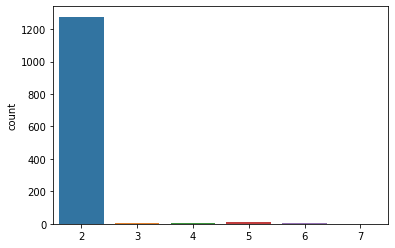

In [65]:
num_null_value_each_row = data.isnull().sum(axis=1)
sns.countplot([item for item in num_null_value_each_row if item > 1])
data["num_null"] = num_null_value_each_row
mask_null_value = data["num_null"].apply(lambda x: x <= 4)
data = data[mask_null_value]

In [66]:
data.isnull().sum()

url             6765
description        0
origin             6
status             0
car_mileage        0
car_color       3291
car_seats         14
gear              28
car_year           2
car_price          0
style             18
model              0
fuel              12
brand_name         0
region_name    14360
url_image        381
website            0
month              0
year               0
car_name           0
num_null           0
dtype: int64

In [67]:
data = data.fillna("Unknown")

In [68]:
data = data.drop(["car_name"], axis = 1).reset_index(drop=True)

In [69]:
data.to_csv("Preprocessed_data.csv", index=False)

# Review

In [70]:
import pandas as pd

In [71]:
data = pd.read_csv('Preprocessed_data.csv')

/home/leo/anaconda3/envs/intern/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [72]:
data["car_seats"].unique()

array(['4.0', '3.0', '2.0', '6.0', '5.0', '1.0', '8.0', '12.0', '7.0',
       '11.0', '29.0', 'Unknown', '16.0', '9.0', '10.0', '0.0', '15.0',
       '30.0', '47.0', 5.0, 7.0, 4.0, 8.0, 16.0, 2.0, 29.0, 3.0, 9.0, 0.0,
       6.0, 46.0, 10.0, 12.0, 30.0, 47.0, 20.0, 40.0, 44.0, 25.0, 17.0,
       23.0, 15.0, 1.0, 45.0, 39.0], dtype=object)

In [73]:
mask = data["car_seats"] == 0.0

In [74]:
data[mask]

url  \
33387  https://bonbanh.com/xe-toyota-corolla_altis-2....   
33412  https://bonbanh.com/xe-toyota-corolla_altis-1....   
33773  https://bonbanh.com/xe-mercedes_benz-sprinter-...   
33794  https://bonbanh.com/xe-bmw-7_series-740li-2018...   
33878  https://bonbanh.com/xe-kia-morning-van-2012-41...   
34378  https://bonbanh.com/xe-mercedes_benz-c_class-c...   
34379  https://bonbanh.com/xe-toyota-hilux--1990-4107900   
34611  https://bonbanh.com/xe-ford-ranger--xls-2.2-at...   
34898  https://bonbanh.com/xe-peugeot-3008-new--allur...   
35036  https://bonbanh.com/xe-mazda-cx5-duluxe-2021-4...   
35054  https://bonbanh.com/xe-toyota-land_cruiser-vx-...   
35097  https://bonbanh.com/xe-mazda-3-1.5at-2018-4120601   
35202  https://bonbanh.com/xe-hyundai-tucson-2.0-ath-...   
35425  https://bonbanh.com/xe-lexus-rx-300t-2019-4120500   
35485  https://bonbanh.com/xe-vinfast-fadil--2019-412...   
35814  https://bonbanh.com/xe-toyota-innova-g-2018-41...   
36133       https://bonbanh.com/xe-mazda-3--2017-4120304   
36254  https://bonbanh.com/xe-landrover-range_rover-a...   
36354   https://bonbanh.com/xe-ford-ranger--2018-4120318   
37001  https://bonbanh.com/xe-suzuki-swift-hatchback-...   
37290  https://bonbanh.com/xe-hyundai-tucson-dac-biet...   
39830  https://bonbanh.com/xe-mercedes_benz-sprinter-...   
40990     https://bonbanh.com/xe-kia-forte--2012-4118493   
41232  https://bonbanh.com/xe-chevrolet-captiva--2007...   
41477  https://bonbanh.com/xe-mazda-cx5-2.5-2018-4117945   
41614  https://bonbanh.com/xe-volkswagen-tiguan--2021...   
43360  https://bonbanh.com/xe-volkswagen-polo-hatchba...   

                                             description     origin  \
33387  Em bán Altis 2.0V 2016 , xe chạy quá ít chỉ hơ...   Việt Nam   
33412  Em cần bán Altis 2016 bản 1.8G, xe 1 chủ từ mớ...   Việt Nam   
33773  Em bán xe MERCEDES BENZ SPRINTER BÁN TẢI .6N/8...   Việt Nam   
33794  Bắt cọp #BMW_740Li Đen kem sản xuất 2018 đki 2...  Nước khác   
33878  Xe tư nhân chính chủ Hải Phòng Bản đủ kịch đồ ...  Nước khác   
34378  Cần bán C300 AMG 2018 Màu trắng nội thất đỏ Bi...   Việt Nam   
34379  TOYOTA HILUX KO NIÊN Hạn sử dụng máy dầu XE KO...  Nước khác   
34611  tầm tiền 5Xx mà đi tìm bán tải không biết lựa ...  Nước khác   
34898  Peugeot NEW 3008 Allure (Bản cao cấp) sx 2021,...   Việt Nam   
35036  Xe vừa mua 5/2021 đi dc hơn 4 nghìn km. Xe Ngu...   Việt Nam   
35054  Xe cực chất Hỗ trợ bank Bao test mọi nơi Xe nh...  Nước khác   
35097   Mazda 3 1.5 AT 2018 trắng  Cá nhân 1 chủ odo ...   Việt Nam   
35202   Hyundai Tucson 2.0 Bản đặc biệt sx 2015  Xe 1...  Nước khác   
35425  ⚜ Lexus Rx300 Màu Đen Nội Thất Nâu Siêu Lướt ⚜...  Nước khác   
35485  Gia đình cần bán Vinfast Fadil 2019 đã lên đồ ...   Việt Nam   
35814  2018 nồi đồng cối đá - fom mới siêu đẹp - G - ...   Việt Nam   
36133  Chính chủ cần bán, Mazda3 fL, xe đẹp, nguyên b...   Việt Nam   
36254  ✓ Model 2015 ✓ Đăng ký lăn bánh lần đầu 2017 ✓...  Nước khác   
36354  Wildtrak Bi Turbo 2 Cầu 2018, Xe Bán Tại Hãng ...  Nước khác   
37001   Suzuki Swift 1.5AT sx2008 nhập Nhật, xe chạy ...  Nước khác   
37290  Bán ngay  Huyndai Tuson 2020 biển HN cực víp o...   Việt Nam   
39830  Em bán xe MERCEDES BENZ SPRINTER 313 đời 2008....   Việt Nam   
40990  Kia Forte 2012 số tay 1 chủ mua mới, xe đẹp cọ...   Việt Nam   
41232  Cần bán xe Captiva số tự động xe còn rất mới.m...   Việt Nam   
41477   Siêu phẩm sản phẩm siêu kinh điển Đã về tới  ...   Việt Nam   
41614  Volkswagen Tiguan - Tặng Quà Siêu Hot Chỉ Khuy...  Nước khác   
43360   .   Ông vua đô thị dành cho đường đông đúc....  Nước khác   

           status  car_mileage car_color car_seats     gear car_year  \
33387  Đã sử dụng      30000.0         -       0.0  Unknown   2016.0   
33412  Đã sử dụng      60000.0         -       0.0  Unknown   2016.0   
33773  Đã sử dụng     250000.0       Bạc       0.0   Số sàn   2007.0   
33794  Đã sử dụng      45000.0       Đen       0.0  Unknown   2018.0   
33878  Đã sử dụng      

In [75]:
data.loc[33387, "car_seats"] = 4.0
data.loc[33412, "car_seats"] = 4.0
data.loc[33773, "car_seats"] = 6.0
data.loc[33794, "car_seats"] = 4.0
data.loc[33878, "car_seats"] = 4.0
data.loc[34378, "car_seats"] = 4.0
data.loc[34379, "car_seats"] = 5.0
data.loc[34611, "car_seats"] = 5.0
data.loc[34898, "car_seats"] = 5.0
data.loc[35036, "car_seats"] = 5.0
data.loc[35054, "car_seats"] = 7.0

In [76]:
idxx = data.index[data["car_seats"] ==0.0]

In [77]:
idxx = idxx.tolist()

In [78]:
for idx in idxx:
    model = data.loc[idx]["model"]
    brand = data.loc[idx]["brand_name"]
#     print(data[(data["brand_name"]==brand)&(data["model"]==model)]["car_seats"].mode().tolist()[0]
    data.loc[idx, "car_seats"] = data[(data["brand_name"]==brand)&(data["model"]==model)]["car_seats"].mode().tolist()[0]

In [79]:
data[data["car_seats"] == 0.0].shape

(0, 20)

In [82]:
data.isna().sum()

url            0
description    0
origin         0
status         0
car_mileage    0
car_color      0
car_seats      0
gear           0
car_year       0
car_price      0
style          0
model          0
fuel           0
brand_name     0
region_name    0
url_image      0
website        0
month          0
year           0
num_null       0
dtype: int64

In [80]:
data.to_csv("Preprocessed_data.csv", index=False)

In [83]:
from matplotlib import pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f2c1affd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f2c223940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f2c1af7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f2c223040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f2c223f70>],
 'means': []}

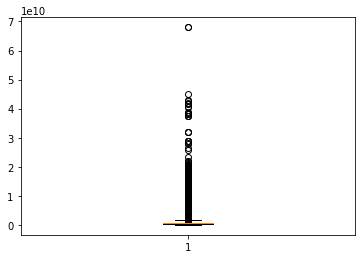

In [84]:
plt.boxplot(data.car_price.values)